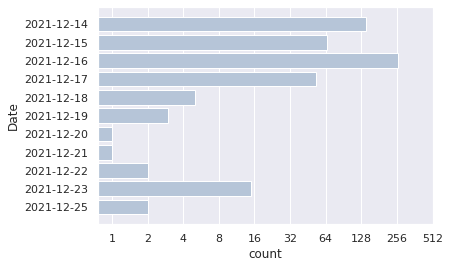

In [1]:
''' Draw timeline of counts per day for log4j hits as reported in Splunk.
    - Use the output of search_log4j_payload.py, search_log4j.txt
'''

import sys
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


class Myopt():
    def __init__(self, args=None):

        self.description = '''Draw timeline of hits per dayParse ip and hosts from file'''
        self.p = argparse.ArgumentParser(description=self.description)
        add = self.p.add_argument
        add("fn", help="Input file containing ip and hosts")
        add("--dedup", action="store_true", help="Deduplicate output")
        add("-o", "--output", help="Output file for time, host", default="log4j_hosts.csv")
        if args:
            self.opt = self.p.parse_args(args)
        else:
            self.opt = self.p.parse_args()
            
arg = ["-", "search_log4j.txt"]

# Read the events returned by the splunk search
if arg is None:
    arg = sys.argv
if len(arg) < 1:
    fn = "search_log4j.txt"
else:
    fn = arg[1]

payload = pd.read_csv(fn)

def get_date(x):
    #
    dt = datetime.strptime(x, "%m/%d/%Y %H:%M:%S")
    result = dt.date()
    return result

payload["day"] = payload["earliest"].apply(get_date)


sns.set_theme(style="darkgrid")

# Get a list of the dates in order
# countplot produces a date scale that appears to be in arbitrary order
order = [ d for d in sorted(set(payload["day"]))]

# countplot returns an axes object which can be used
# to customize the appearance of the plot.
# Make plot horizontal by using y. It's easier to read the scale.
grid = sns.countplot(data=payload, y="day", color='lightsteelblue', order=order)

# Tilt the axis labels. Necessary if day is on the x-axis.
plt.setp(grid.axes.get_xticklabels(), rotation=0)

# Change the label. "day" had to be used to avoid reserved word, date
grid.axes.set_ylabel("Date")

# Use log (base2) scale for count
plt.semilogx(base=2)

#
# grid.axes.set_xticks([1, 2,4,8,16,32,64,128,256, 512])
import math

# Find the tick labels for the base 2 log scale of x-axis
# Get the range of calculated count.
xmin, xmax = grid.axes.get_xlim()
# Compute the number of labels, nlabels = min(n) such that 2**n >= xmax
nlabels = math.floor(math.log(xmax)/math.log(2)) + 1

# Set the ticks. Add 1 because range does not include highest value
grid.axes.set_xticks([2**n for n in range(nlabels + 1)])

# Clear the formatting of the xticklabel. By default it is shown as 2 with n superscript.
from matplotlib import ticker
grid.axes.get_xaxis().set_major_formatter(ticker.ScalarFormatter())